# perform authorization
[apt-key](https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
!pip install bt

    100% |████████████████████████████████| 2.7MB 6.5MB/s 
    100% |████████████████████████████████| 112kB 32.3MB/s 
    100% |████████████████████████████████| 51kB 25.1MB/s 
    100% |████████████████████████████████| 5.6MB 6.1MB/s 
  Running setup.py bdist_wheel for bt ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/81/55/3f/fcdc34cd2deadbdb3caa10a836b8b17f5fcf00906778f74e84
  Running setup.py bdist_wheel for ffn ... - done
  Stored in directory: /content/.cache/pip/wheels/9e/2a/38/3d8ef11be8474d164883394e4d617ffe8569171c8f675f50e8
  Running setup.py bdist_wheel for pyprind ... - done
  Stored in directory: /content/.cache/pip/wheels/4c/ed/f4/966a298352e737031124486720b3ec37d7ab4ae57328ee1021
  Running setup.py bdist_wheel for tabulate ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
  Running setup.py bdist_wheel for wrapt ... -

 \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
  Running setup.py bdist_wheel for requests-ftp ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/98/32/37195e45a3392a73d9f65c488cbea30fe5bad76aaef4d6b020
Successfully built bt ffn pyprind tabulate wrapt requests-ftp


In [0]:
path = "drive/capstone/"

In [0]:
import bt
import pandas as pd
import os

from datetime import datetime

codes = ["0012","0017","0683","3323","0158","0062","0066"]

In [0]:
data = pd.read_csv(path+"stock_price/{}.HK.csv".format(codes[0]))[["Open","Date"]]
data.rename(index=str, columns={"Open": str(codes[0])}, inplace=True)
data["Date"] = pd.to_datetime(data.Date, format="%Y-%m-%d", errors='ignore')
data.set_index("Date", inplace=True)
for i in codes[1:]:
  df = pd.read_csv(path+"stock_price/{}.HK.csv".format(i))[["Open","Date"]]
  data.rename(index=str, columns={"Open": i}, inplace=True)
  df["Date"] = pd.to_datetime(df. Date, format="%Y-%m-%d", errors='ignore')
  df.set_index("Date", inplace=True)
  data = pd.merge(data, df, left_index=True, right_index=True)

In [0]:
data.ffill(inplace=True)

In [0]:
data.rename(index=str, columns={"Open": "0017"}, inplace=True)

In [9]:
data.isnull().sum()

0012    0
0683    0
3323    0
0158    0
0062    0
0066    0
0017    0
dtype: int64

In [10]:
data.index = data.index.to_datetime()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


In [11]:
data = data.resample('W', 'first')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """Entry point for launching an IPython kernel.


In [0]:
data = data[data.index >= datetime.strptime('2008-07-13', '%Y-%m-%d')]

In [13]:
data.head()

,0012,0683,3323,0158,0062,0066,0017
2008-07-13,28.500299,12.3582,40.900002,7.30,68.500000,33.849998,24.15
2008-07-20,28.810699,13.0069,40.250000,8.08,68.199997,32.299999,24.65
2008-07-27,29.152300,12.5460,35.500000,8.05,66.800003,33.000000,25.10
2008-08-03,30.301001,13.1434,38.549999,7.65,69.000000,32.200001,25.65
2008-08-10,30.114700,12.5460,41.000000,7.50,69.000000,30.900000,26.35


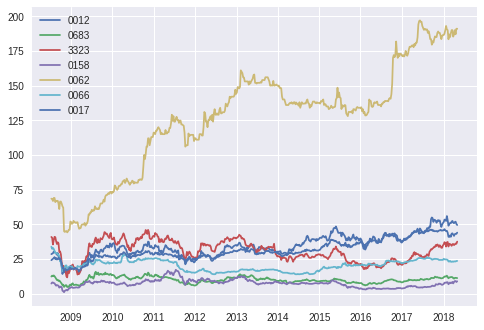

In [14]:
data.plot()

In [15]:
data.index

DatetimeIndex(['2008-07-13', '2008-07-20', '2008-07-27', '2008-08-03',
               '2008-08-10', '2008-08-17', '2008-08-24', '2008-08-31',
               '2008-09-07', '2008-09-14',
               ...
               '2018-03-04', '2018-03-11', '2018-03-18', '2018-03-25',
               '2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29', '2018-05-06'],
              dtype='datetime64[ns]', length=513, freq='W-SUN')

In [0]:
tw = data.copy()

In [0]:
tw[:] = None

In [18]:
tw.head()

,0012,0683,3323,0158,0062,0066,0017
2008-07-13,None,None,None,None,None,None,None
2008-07-20,None,None,None,None,None,None,None
2008-07-27,None,None,None,None,None,None,None
2008-08-03,None,None,None,None,None,None,None
2008-08-10,None,None,None,None,None,None,None


In [0]:
tw = pd.read_csv(path+"weights.csv")

In [0]:
tw["Date"] = pd.to_datetime(tw.Date, format="%Y-%m-%d", errors='ignore')

In [0]:
tw.set_index("Date", inplace=True)

In [0]:
data = data[data.index.isin(tw.index)]

In [42]:
tw.shape

(452, 7)

In [43]:
data.shape

(452, 7)

In [0]:
import numpy as np

In [0]:
s = bt.Strategy('AI', [bt.algos.WeighTarget(tw), bt.algos.Rebalance()])

In [0]:
t = bt.Backtest(s, data)

In [0]:
bnh = bt.Strategy("buy and hold", [bt.algos.RunOnce(),bt.algos.SelectAll(),bt.algos.WeighEqually(),bt.algos.Rebalance()])
t2 = bt.Backtest(bnh,data)

In [48]:
res = bt.run(t,t2)

AI
0% [############################# ] 100% | ETA: 00:00:00buy and hold
0% [############################# ] 100% | ETA: 00:00:00

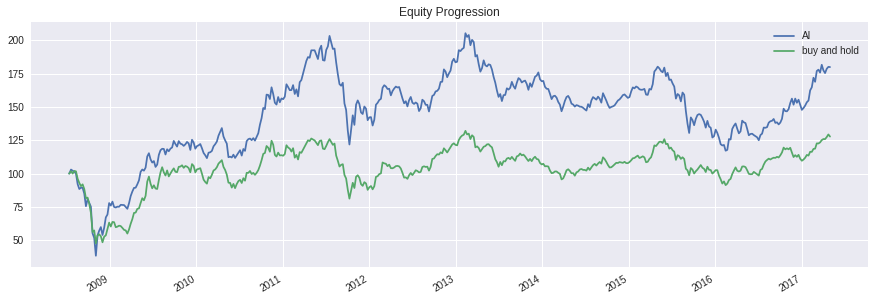

In [49]:
res.plot()

In [50]:
res.display()

Stat                 AI          buy and hold
-------------------  ----------  --------------
Start                2008-07-12  2008-07-12
End                  2017-04-30  2017-04-30
Risk-free rate       0.00%       0.00%

Total Return         79.83%      27.73%
Daily Sharpe         0.82        0.53
Daily Sortino        1.13        0.70
CAGR                 6.90%       2.82%
Max Drawdown         -62.75%     -53.32%
Calmar Ratio         0.11        0.05

MTD                  -0.94%      2.12%
3m                   16.22%      12.59%
6m                   22.62%      7.42%
YTD                  18.75%      14.95%
1Y                   28.79%      21.34%
3Y (ann.)            5.69%       8.46%
5Y (ann.)            1.76%       3.94%
10Y (ann.)           6.90%       2.82%
Since Incep. (ann.)  6.90%       2.82%

Daily Sharpe         0.82        0.53
Daily Sortino        1.13        0.70
Daily Mean (ann.)    54.37%      27.35%
Daily Vol (ann.)     66.15%      52.07%
Daily Skew           1.03       